- Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1) Read and Prepare the Dataset for Visual Analysis

In [ ]:
# Read the dataset
df = pd.read_csv("data/games_reviews_english_sentimented.csv")

df["sentiment"] = df["sentiment"].apply(lambda x: x.capitalize()) # Capitalize sentiment groups

# Create bins and labels (10 intervals, 0–9, 10–19, ..., 90–100)
bins = list(range(0, 101, 10))  # [0, 10, 20, ..., 100]
bins[-1] = 101  # Make sure last bin includes 100
labels = [f"{i}-{i+9}" for i in range(0, 90, 10)] + ["90-100"]

# Apply binning
df["score_bin"] = pd.cut(df["score"], bins=bins, labels=labels, include_lowest=True, right=False)

In [29]:
df.sample(5)

,id,title,quote,score,date,platform,author,publicationName,review_type,language,labels,sentiment,sentiment_score,score_bin
1065295,1300027705,Penumbra: Overture,I originally only bought this game as a DLC of...,70.0,2012-06-13,PC,LA_DOTTORE,NaN,user,en,2,Neutral,0.537645,70-79
1088532,1300044324,Battlefield 3: Close Quarters,"Any way I look at it, I can't help but notice ...",50.0,2012-09-04,PC,WLF67,NaN,user,en,1,Neutral,0.440907,50-59
220863,1300468442,Slay the Spire,Nice artstyle with fluid gameplay. Easy to und...,80.0,2020-02-11,PC,Shadran,NaN,user,en,2,Positive,0.784225,80-89
997931,1300628811,Nobody Wants to Die,Detective noir has rarely felt so authentic in...,80.0,2024-08-30,PC,NaN,RPG Fan,critic,en,2,Positive,0.575294,80-89
1163271,1300455878,Deadlight: Director's Cut,A success. It’s as grueling and intense as dou...,75.0,2016-08-15,PlayStation 4,NaN,GameCritics,critic,en,2,Positive,0.994492,70-79


### 2) Visualizations

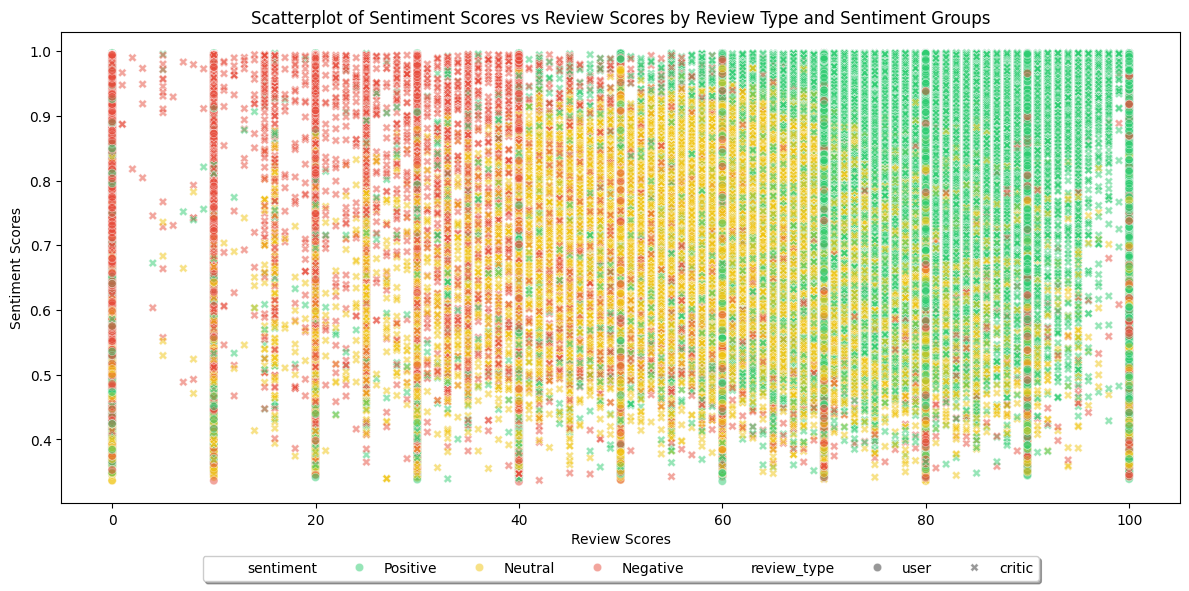

In [31]:
# Scatterplot of sentiment scores vs review scores by sentiment groups and review types

plt.figure(figsize=(12, 6))

fig = sns.scatterplot(
	data=df,
	x="score",
	y="sentiment_score",
	hue="sentiment",
	style="review_type",
	palette=["#2ecc71", "#f1c40f", "#e74c3c"],
	alpha=0.5
)

plt.xlabel("Review Scores")
plt.ylabel("Sentiment Scores")
plt.title("Scatterplot of Sentiment Scores vs Review Scores by Review Type and Sentiment Groups")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.18),
          fancybox=True, shadow=True, ncol=10)
plt.tight_layout()
plt.show()

In [224]:
# Percentages of sentiments of the review

pie_data = df.groupby("sentiment")["id"].count().reset_index()

fig = px.pie(
	data_frame = pie_data,
	values = "id",
	names = "sentiment",
	color="sentiment",
	color_discrete_map={
		'Positive': '#2ecc71',
  		'Neutral': '#f1c40f',
		'Negative': '#e74c3c'
		},
	hole=0.4
	)

fig.update_traces(
	hoverinfo='percent', 
	textinfo='percent',
	textfont_size=20, 
	texttemplate='<b>%{percent}</b>',
	marker=dict(line=dict(color='white', width=4)),
	hovertemplate=
	"<b>%{label}</b><br><b>%{percent}</b>"
	)

fig.update_layout(
	dragmode=False,
	margin=dict(t=25, b=0, l=10, r=0),
	legend_title="Sentiments", 
	title="",
	showlegend=True,
	font_family="Arial",
	autosize=False,
	width=500,
	height=325
	)

In [221]:
# Percentages of score bins

pie_data = df.groupby("score_bin", observed=True)["id"].count().reset_index()

fig = px.pie(
	data_frame = pie_data,
	values = "id",
	names = "score_bin",
	color="score_bin",
	hole=0.4
	)
fig.update_traces(
	hoverinfo='percent', 
	textinfo='percent',
	textfont_size=20, 
	texttemplate='<b>%{percent}</b>',
	marker=dict(line=dict(color='white', width=4)),
	hovertemplate=
	"<b>%{label}</b><br><b>%{percent}</b>"
	)

fig.update_layout(
    dragmode=False,
	margin=dict(t=25, b=0, l=10, r=0),
	legend_title="Score Bins", 
	title="",
	showlegend=True,
	font_family="Arial",
	autosize=False,
	width=500,
	height=325
	)

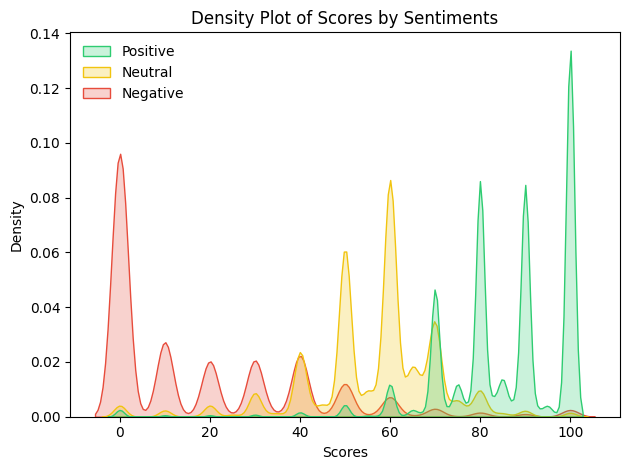

In [ ]:
# Density plot of the score intervals between sentiments - normalized independetly to better visual analysis

fig = sns.kdeplot(
    data=df, 
    x="score", 
    hue="sentiment", 
    common_norm=False, 
    fill=True, 
    palette=["#2ecc71", "#f1c40f", "#e74c3c"])

sns.move_legend(fig, "best", frameon=False, title="")

plt.xlabel("Scores")
plt.ylabel("Density")
plt.title("Density Plot of Scores by Sentiments")
plt.tight_layout()
plt.show()

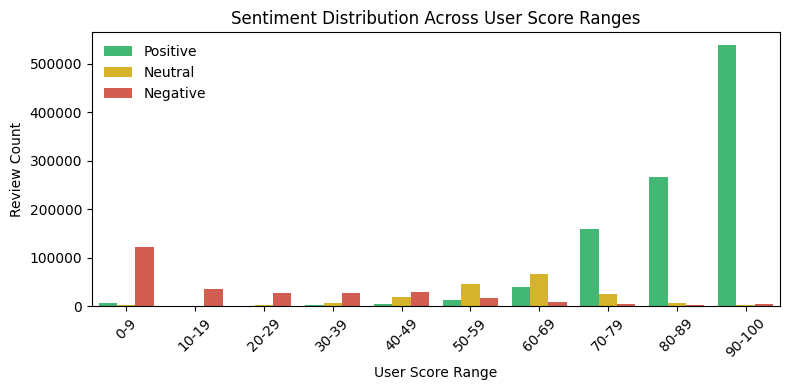

In [225]:
# Sentiment score distributions by score bins

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="score_bin", hue="sentiment", palette=["#2ecc71", "#f1c40f", "#e74c3c"])
plt.xlabel("User Score Range")
plt.ylabel("Review Count")
plt.title("Sentiment Distribution Across User Score Ranges")
plt.xticks(rotation=45)
plt.legend(loc='best', frameon=False)
plt.tight_layout()
plt.show()

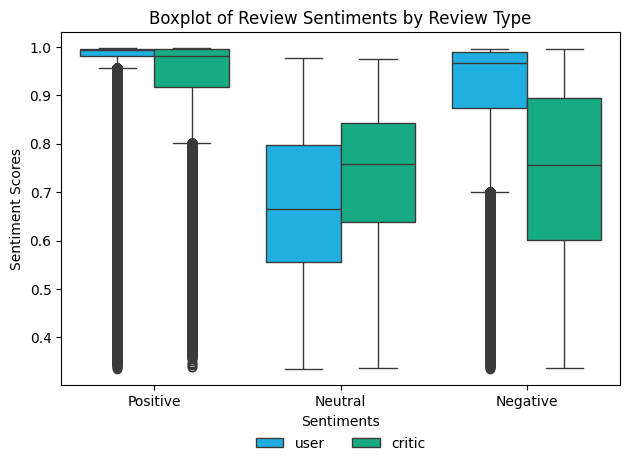

In [ ]:
# Boxplot of review sentiments by review types

fig = sns.boxplot(
    data=df, 
    x='sentiment', 
    y='sentiment_score',
    hue="review_type", 
    palette=["#00bfff", "#00c28d"]
)

plt.xlabel("Sentiments")
plt.ylabel("Sentiment Scores")
plt.title("Boxplot of Review Sentiments by Review Type")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22),
          frameon=False, ncol=2)
plt.tight_layout()
plt.show()

In [ ]:
# Bar chart of the game scores with highest average sentiments

bar_data = df.groupby("title")[["score", "sentiment_score"]].agg("mean").reset_index().sort_values(by="sentiment_score", ascending=False)
bar_data.reset_index(inplace=True, drop=True)

fig = px.bar(
	data_frame = bar_data.iloc[:20],
	y = "score",
	x = "title",
	orientation = "v",
	text='sentiment_score',
	custom_data=["sentiment_score"]
)

fig.update_layout(
	margin={"r":0,"t":35,"l":0,"b":0}, 
	dragmode=False, 
	plot_bgcolor='rgba(0,0,0,0)',
	title_text="Highest Average Sentimented Game Scores", title_x=0.5, title_y=0.98,
	font_family="Arial",
	autosize=False,
	height=500,
	width=1000,
	xaxis_title="Games",
	yaxis_title="Scores",
	bargap=0.5
	)

fig.update_traces(
	textposition="inside",
	insidetextanchor="middle",
	texttemplate='<b>%{x}</b>',
 	hovertemplate="<br>".join([
		"Title: <b>%{x}</b>",
		"Score: <b>%{y:,.2f}</b>",
		"Avg. Sentiment Score: <b>%{customdata[0]:,.4f}</b>"
	]),
	textfont_color="black")

fig.update_xaxes(
	showticklabels=False
	)

fig.show()

In [ ]:
# Bar chart of the game scores with lowest average sentiments

fig = px.bar(
	data_frame = bar_data.iloc[-20:],
	y = "score",
	x = "title",
	orientation = "v",
	text='sentiment_score',
	custom_data=["sentiment_score"]
)

fig.update_layout(
	margin={"r":0,"t":35,"l":0,"b":0}, 
	dragmode=False, 
	plot_bgcolor='rgba(0,0,0,0)',
	title_text="Lowest Average Sentimented Game Scores", title_x=0.5, title_y=0.98,
	font_family="Arial",
	autosize=False,
	height=500,
	width=1000,
	xaxis_title="Games",
	yaxis_title="Scores",
	bargap=0.5
	)

fig.update_traces(
	textposition="inside",
	insidetextanchor="middle",
	texttemplate='<b>%{x}</b>',
 	hovertemplate="<br>".join([
		"Title: <b>%{x}</b>",
		"Score: <b>%{y:,.2f}</b>",
		"Avg. Sentiment Score: <b>%{customdata[0]:,.4f}</b>"
	]),
	textfont_color="black")

fig.update_xaxes(
	showticklabels=False
	)

fig.show()